<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml
!pip install lxml

In [3]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup
import lxml
import xml.etree.ElementTree as ET
# arquivo = '/content/estados_brutos.xml'

with open("/content/Profissao Analista de dados M13 Exercicio original (3).xml",'r',encoding='utf-8') as arquivo:
 xml = arquivo.read()
 pagina = BeautifulSoup(xml,'xml')
 root = ET.fromstring(xml)

In [6]:
# visualize os resultados

#fonte
print(pagina)

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [7]:
# manipule os dados

# continue o codigo aqui

import pandas as pd
from tables.index import Index
ids = []
nomes = []
idcapitais = []
siglas = []
regioes = []

# Itere sobre os elementos ESTADO
for estado in root.findall('ESTADO'):
    ids.append(estado.find('ID').text)
    nomes.append(estado.find('NOME').text)
    idcapitais.append(estado.find('IDCAPITAL').text)
    siglas.append(estado.find('SIGLA').text)
    regioes.append(estado.find('REGIAO').text)

# Crie um DataFrame com os dados
data = {'ID': ids, 'NOME': nomes, 'IDCAPITAL': idcapitais, 'SIGLA': siglas, 'REGIAO': regioes}
df_extraido = pd.DataFrame(data)

# Exiba o DataFrame
print(df_extraido.to_string(index=False))

ID                NOME IDCAPITAL SIGLA       REGIAO
 1                ACRE        16    AC        NORTE
 2             ALAGOAS        68    AL     NORDESTE
 3               AMAPA       131    AP        NORTE
 4            AMAZONAS       178    AM        NORTE
 5               BAHIA       536    BA     NORDESTE
 6               CEARA       676    CE     NORDESTE
 7    DISTRITO FEDERAL       916    DF CENTRO-OESTE
 8      ESPIRITO SANTO       879    ES      SUDESTE
 9               GOIAS       973    GO CENTRO-OESTE
10            MARANHAO      1309    MA     NORDESTE
11         MATO GROSSO      1374    MT CENTRO-OESTE
12  MATO GROSSO DO SUL      1485    MS CENTRO-OESTE
13                PARA      1561    PA        NORTE
14             PARAIBA      1779    PB     NORDESTE
15              PARANA      2002    PR          SUL
16          PERNAMBUCO      2439    PE     NORDESTE
17               PIAUI      2704    PI     NORDESTE
18      RIO DE JANEIRO      2779    RJ      SUDESTE
19 RIO GRAND

In [9]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui

NOME_ARQUIVO_DESTINO = 'estados_limpos.csv'

# continue o codigo aqui
estados_df = df_extraido.rename(columns={'ID':'id','NOME':'estado', 'IDCAPITAL':'id_capital','SIGLA':'sigla','REGIAO':'regiao'}) #renomenado colunas
estados_df.to_csv(path_or_buf=NOME_ARQUIVO_DESTINO, sep=';', index=False) # escrevendo arquivo csv com Pandas

estados_df.to_csv(NOME_ARQUIVO_DESTINO,sep=',',index=False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [10]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = ... # continue o codigo aqui



arquivo_fonte= '/content/cidades-bruto.csv'
df_arquivo_fonte = pd.read_csv(arquivo_fonte)
print(type(df_arquivo_fonte))
print(df_arquivo_fonte.head(10))

# print(type(df_arquivo_fonte))
# df_1 = pd.DataFrame(df_arquivo_fonte)
# print(type(df_1))
# df_arquivo_fonte.head

<class 'pandas.core.frame.DataFrame'>
                                               FID   gid                 UF  \
0  vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215              BAHIA   
1  vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306  RIO GRANDE DO SUL   
2  vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900     ESPIRITO SANTO   
3  vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613       MINAS GERAIS   
4  vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028              PIAUÍ   
5  vw_pib_percapita.fid-4514e25a_17aaa325034_-258a  3403       MINAS GERAIS   
6  vw_pib_percapita.fid-4514e25a_17aaa325034_-2589  1029              PIAUÍ   
7  vw_pib_percapita.fid-4514e25a_17aaa325034_-2588  5153              PIAUÍ   
8  vw_pib_percapita.fid-4514e25a_17aaa325034_-2587  1048              GOIÁS   
9  vw_pib_percapita.fid-4514e25a_17aaa325034_-2586  2629         PERNAMBUCO   

           nome   Censo           PIB  Pop_est_2009  PIB_percapita  \
0      Tremedal  2010.

In [11]:
# visualize os resultados

# continue o codigo aqui


nome_especifico = 2010.0
# dados_sexo_masculino = df_arquivo_fonte.loc[df_arquivo_fonte['UF'] == nome_especifico, ['UF', 'nome']]
colunas_selecionadas = ['Censo','UF','nome','Pop_est_2009','PIB','PIB_percapita']
dados_censo_2010 = df_arquivo_fonte.loc[df_arquivo_fonte['Censo'] == nome_especifico,colunas_selecionadas]
# Exiba as linhas com o nome específico
dados_censo_2010.head(10)
# continue o codigo aqui

,Censo,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,2010.0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,2010.0,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,2010.0,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,2010.0,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,2010.0,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
5,2010.0,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195
6,2010.0,PIAUÍ,Teresina,802537,8.700461e+06,10841.200195
7,2010.0,PIAUÍ,Amarante,17892,6.532289e+04,3650.949951
8,2010.0,GOIÁS,Matrinchã,4420,4.591055e+04,10387.000000
9,2010.0,PERNAMBUCO,Cachoeirinha,18123,8.043380e+04,4438.220215


In [12]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
# manipule os dados

# continue o codigo aqui

In [13]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui


# NOME_ARQUIVO_DESTINO = 'cidades_limpo.csv'

from unidecode import unidecode

NOME_ARQUIVO_DESTINO = 'censo_2010_limpo.csv'

dados_censo_2010 = dados_censo_2010.rename(columns={'UF':'estado', 'nome': 'cidade', 'Pop_est_2009': 'populacao', 'PIB':'pib', 'PIB_percapita': 'pib_percapita'}) #renomenado colunas
dados_censo_2010['estado'] = dados_censo_2010['estado'].apply(unidecode)
dados_censo_2010.to_csv(NOME_ARQUIVO_DESTINO,sep=',',index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [14]:
# solução do exercício 1.3

dados_censo_2010

,Censo,estado,cidade,populacao,pib,pib_percapita
0,2010.0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,2010.0,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,2010.0,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,2010.0,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,2010.0,PIAUI,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...,...
5561,2010.0,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,2010.0,PARANA,Planalto,13983,1.385535e+05,9908.709961
5563,2010.0,SAO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,2010.0,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [15]:
# solução do exercício 2.1


#primeira passo vou normalizar o nome da coluna em comum para os Dataframes
#a  Intersecção entre eles sera feita pela coluna Estado
#no arquivo: new_separator_censo_2010_limpo.csv alterando o nome da coluna ['UF]  -> ['ESTADO']
# no arquivo: new_separator_estados_limpos.csv  alterando nome da coluna ['NOME'] -> ['ESTADO']
import pandas as pd

file_censo_2010_limpo = 'censo_2010_limpo.csv'
# file_estados_limpos ='new_separator_estados_limpos.csv'

df_censo = pd.read_csv(file_censo_2010_limpo)
# df_estados = pd.read_csv(file_estados_limpos)

# head_df_censo = df_censo.head()
# head_df_censo

for col in df_censo.columns:
  print(col)

# df_censo_1 = df_censo.rename(columns={"UF":"ESTADO"})
# # df_censo_2 = df_censo.columns.values[0]='New_name'

# df_censo_1

Censo
estado
cidade
populacao
pib
pib_percapita


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [16]:
# código para responder a pergunta

# solução do exercício 1.3
#primeira passo vou normalizar o nome da coluna em comum para os Dataframes
#a  Intersecção entre eles sera feita pela coluna Estado
#no arquivo: new_separator_censo_2010_limpo.csv alterando o nome da coluna ['UF]  -> ['ESTADO']
# no arquivo: new_separator_estados_limpos.csv  alterando nome da coluna ['NOME'] -> ['ESTADO']
import pandas as pd
import csv

file_censo_2010_limpo = 'censo_2010_limpo.csv'
file_estados_limpos ='estados_limpos.csv'

df_censo = pd.read_csv(file_censo_2010_limpo)
df_estados = pd.read_csv(file_estados_limpos)

print('dados sobre o DF: Censo 2010')
for col in df_censo.columns:
  print(col)

print(len(df_censo))
print(len(df_censo.columns))

with open(file_censo_2010_limpo, 'r') as csvfile:
  dialect = csv.Sniffer().sniff(csvfile.readline())
  print(dialect.delimiter)
print('\n')
#################################################################################
print('dados sobre o DF: Estados')
for col in df_estados.columns:
  print(col)

print(len(df_estados))
print(len(df_estados.columns))
with open(file_estados_limpos, 'r') as csvfile:

  dialect = csv.Sniffer().sniff(csvfile.readline())
  print(dialect.delimiter)
# df_censo_1 = df_censo.rename(columns={"estado":"ESTADO"})

# df_censo.head(10)
# df_estados.head(10)

dados sobre o DF: Censo 2010
Censo
estado
cidade
populacao
pib
pib_percapita
5555
6
,


dados sobre o DF: Estados
id
estado
id_capital
sigla
regiao
27
5
,


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta

 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [17]:
# código para responder a pergunta

df_unido = pd.merge(df_censo, df_estados, on='estado', how='inner')

for col in df_unido.columns:
  print(col)

print(len(df_unido))
print(len(df_unido.columns))

null_count = df_unido.isnull().sum().sum()
print('Number of null values:', null_count)

# df_unido.head(10)

Censo
estado
cidade
populacao
pib
pib_percapita
id
id_capital
sigla
regiao
5555
10
Number of null values: 0


 - Qual é o PIB do estado de Santa Catarina?

In [18]:
# código para responder a pergunta
df_unido.to_csv('brasil.csv', index=False, sep=',')

In [24]:
# # # código para responder a pergunta
# pib_sc = brasil_df[brasil_df['estado']=='SANTA CATARINA'].nlargest(15,'pib')
# # print(pib_sc)

# Filtrar o DataFrame para pegar apenas os estados de Santa Catarina
santa_catarina = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']
# Calcular a soma dos valores da coluna 'PIB' para Santa Catarina
soma_pib_santa_catarina = santa_catarina['pib'].sum()
print(soma_pib_santa_catarina)

129806256.75195317


In [19]:
file_brasil_csv = 'brasil.csv'
df_brasil = pd.read_csv(file_brasil_csv)
df_brasil.head(10)

,Censo,estado,cidade,populacao,pib,pib_percapita,id,id_capital,sigla,regiao
0,2010.0,BAHIA,Tremedal,18433,57883.992188,3140.239990,5,536,BA,NORDESTE
1,2010.0,BAHIA,Maetinga,7884,23558.447266,2988.129883,5,536,BA,NORDESTE
2,2010.0,BAHIA,Ibirapuã,7893,74997.406250,9501.759766,5,536,BA,NORDESTE
3,2010.0,BAHIA,Governador Mangabeira,20668,92903.820312,4495.060059,5,536,BA,NORDESTE
4,2010.0,BAHIA,Ibititá,19410,62366.886719,3213.129883,5,536,BA,NORDESTE
5,2010.0,BAHIA,Sátiro Dias,18919,75908.460938,4012.290039,5,536,BA,NORDESTE
6,2010.0,BAHIA,Irajuba,7666,29224.988281,3812.290039,5,536,BA,NORDESTE
7,2010.0,BAHIA,Itaquara,7743,33105.699219,4275.569824,5,536,BA,NORDESTE
8,2010.0,BAHIA,Cansanção,34093,112228.773438,3291.840088,5,536,BA,NORDESTE
9,2010.0,BAHIA,Itaparica,20796,102586.648438,4933.000000,5,536,BA,NORDESTE


In [20]:
# solução do exercício 2.1
file_brasil_csv = 'brasil.csv'
brasil_df = pd.read_csv(file_brasil_csv)
brasil_df.head(10)

,Censo,estado,cidade,populacao,pib,pib_percapita,id,id_capital,sigla,regiao
0,2010.0,BAHIA,Tremedal,18433,57883.992188,3140.239990,5,536,BA,NORDESTE
1,2010.0,BAHIA,Maetinga,7884,23558.447266,2988.129883,5,536,BA,NORDESTE
2,2010.0,BAHIA,Ibirapuã,7893,74997.406250,9501.759766,5,536,BA,NORDESTE
3,2010.0,BAHIA,Governador Mangabeira,20668,92903.820312,4495.060059,5,536,BA,NORDESTE
4,2010.0,BAHIA,Ibititá,19410,62366.886719,3213.129883,5,536,BA,NORDESTE
5,2010.0,BAHIA,Sátiro Dias,18919,75908.460938,4012.290039,5,536,BA,NORDESTE
6,2010.0,BAHIA,Irajuba,7666,29224.988281,3812.290039,5,536,BA,NORDESTE
7,2010.0,BAHIA,Itaquara,7743,33105.699219,4275.569824,5,536,BA,NORDESTE
8,2010.0,BAHIA,Cansanção,34093,112228.773438,3291.840088,5,536,BA,NORDESTE
9,2010.0,BAHIA,Itaparica,20796,102586.648438,4933.000000,5,536,BA,NORDESTE


 - Qual é o população da região sul?

In [21]:
# código para responder a pergunta

cidades_mais_populosas = brasil_df.nlargest(5,'populacao')
print(cidades_mais_populosas)

       Censo            estado          cidade  populacao          pib  \
3271  2010.0         SAO PAULO       São Paulo   11037593  389317152.0   
4504  2010.0    RIO DE JANEIRO  Rio de Janeiro    6186710  175739344.0   
44    2010.0             BAHIA        Salvador    2998056   32824228.0   
5554  2010.0  DISTRITO FEDERAL        Brasília    2606885  131487264.0   
4221  2010.0             CEARA       Fortaleza    2505552   31789186.0   

      pib_percapita  id  id_capital sigla        regiao  
3271   35271.929688  24        4361    SP       SUDESTE  
4504   28405.949219  18        2779    RJ       SUDESTE  
44     10948.500000   5         536    BA      NORDESTE  
5554   50438.460938   7         916    DF  CENTRO-OESTE  
4221   12687.500000   6         676    CE      NORDESTE  


In [25]:
# código para responder a pergunta
regiao_sul = brasil_df[brasil_df['regiao']=='SUL']
soma_popupalacao_regiao_sul = regiao_sul['populacao'].sum()
print(soma_popupalacao_regiao_sul)

27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [22]:
# código para responder a pergunta

menor_pib_percapita_nordeste = brasil_df[brasil_df['regiao']=='NORDESTE'].nsmallest(5,'pib_percapita')
print(menor_pib_percapita_nordeste)

       Censo    estado              cidade  populacao           pib  \
4464  2010.0  MARANHAO  São Vicente Ferrer      20463  39492.960938   
4359  2010.0  MARANHAO             Cajapió      10337  22781.035156   
1848  2010.0     PIAUI       Dom Inocêncio      10795  25457.230469   
4483  2010.0  MARANHAO            Timbiras      26909  63724.851562   
4380  2010.0  MARANHAO               Axixá      15203  36745.226562   

      pib_percapita  id  id_capital sigla    regiao  
4464    1929.969971  10        1309    MA  NORDESTE  
4359    2203.830078  10        1309    MA  NORDESTE  
1848    2358.239990  17        2704    PI  NORDESTE  
4483    2368.159912  10        1309    MA  NORDESTE  
4380    2416.969971  10        1309    MA  NORDESTE  


In [26]:
# código para responder a pergunta

mato_grosso_do_sul = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']
pib_medio_ms = mato_grosso_do_sul['pib_percapita'].mean()
print(pib_medio_ms)
print(mato_grosso_do_sul)

14458.896859975644
       Censo              estado                    cidade  populacao  \
5219  2010.0  MATO GROSSO DO SUL                   Corumbá      99467   
5220  2010.0  MATO GROSSO DO SUL                 Anastácio      23047   
5221  2010.0  MATO GROSSO DO SUL                    Sonora      13334   
5222  2010.0  MATO GROSSO DO SUL               Alcinópolis       4515   
5223  2010.0  MATO GROSSO DO SUL                  Angélica       7465   
...      ...                 ...                       ...        ...   
5292  2010.0  MATO GROSSO DO SUL                Taquarussu       3165   
5293  2010.0  MATO GROSSO DO SUL  Rio Verde de Mato Grosso      19216   
5294  2010.0  MATO GROSSO DO SUL                  Dourados     189762   
5295  2010.0  MATO GROSSO DO SUL           Chapadão do Sul      17293   
5296  2010.0  MATO GROSSO DO SUL          Coronel Sapucaia      14569   

               pib  pib_percapita  id  id_capital sigla        regiao  
5219  2.715507e+06   27300.58007

 - Qual é a população do Brasil?

In [23]:
# código para responder a pergunta
# código para responder a pergunta
#Não vou conseguir achar o valor São Paulo pois eu preciso fazer o tratamento de dados dos nomes antes
#Para ambos ficarem iguais , ou seja antes de salvar em csv eu preciso Certificar que os 2 tenham o mesmo
#Nome antes de ter o arquivo censo_2010_limpo
maior_pib_sp = brasil_df[brasil_df['estado']=='SAO PAULO'].nlargest(15,'pib')
print(maior_pib_sp)

       Censo     estado                 cidade  populacao          pib  \
3271  2010.0  SAO PAULO              São Paulo   11037593  389317152.0   
3223  2010.0  SAO PAULO              Guarulhos    1299283   32473828.0   
3340  2010.0  SAO PAULO               Campinas    1064669   31654720.0   
3106  2010.0  SAO PAULO                 Osasco     718646   31616452.0   
2810  2010.0  SAO PAULO  São Bernardo do Campo     810979   28935768.0   
3344  2010.0  SAO PAULO                Barueri     270173   26908070.0   
2768  2010.0  SAO PAULO                 Santos     417098   22546134.0   
2994  2010.0  SAO PAULO    São José dos Campos     615871   22018042.0   
3014  2010.0  SAO PAULO                Jundiaí     349929   16585137.0   
2816  2010.0  SAO PAULO            Santo André     673396   14709603.0   
2754  2010.0  SAO PAULO         Ribeirão Preto     563107   14688064.0   
3152  2010.0  SAO PAULO               Sorocaba     584313   14182597.0   
3038  2010.0  SAO PAULO               

In [27]:
# código para responder a pergunta

poupulcao_brasil = brasil_df['populacao'].sum()
print(poupulcao_brasil)

191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [28]:
# código para gerar a visualização
# código para gerar a visualização
import matplotlib.pyplot as plt
cidade_menos_populosas_brasil = brasil_df.sort_values(by='populacao')

head_cidades=cidade_menos_populosas_brasil.head(5)
print(head_cidades)

       Censo        estado            cidade  populacao           pib  \
3224  2010.0     SAO PAULO              Borá        837  50332.714844   
1485  2010.0  MINAS GERAIS  Serra da Saudade        890  10433.846680   
2283  2010.0         GOIAS        Anhanguera       1018   8194.404297   
4673  2010.0   MATO GROSSO        Araguainha       1115  11522.663086   
3247  2010.0     SAO PAULO     Nova Castilho       1122  26578.259766   

      pib_percapita  id  id_capital sigla        regiao  
3224   60134.660156  24        4361    SP       SUDESTE  
1485   11723.419922  27        4790    MG       SUDESTE  
2283    8049.509766   9         973    GO  CENTRO-OESTE  
4673   10334.230469  11        1374    MT  CENTRO-OESTE  
3247   23688.289062  24        4361    SP       SUDESTE  


 - Gere um gráfico de Barra com a proporção da população do Brasil por região.

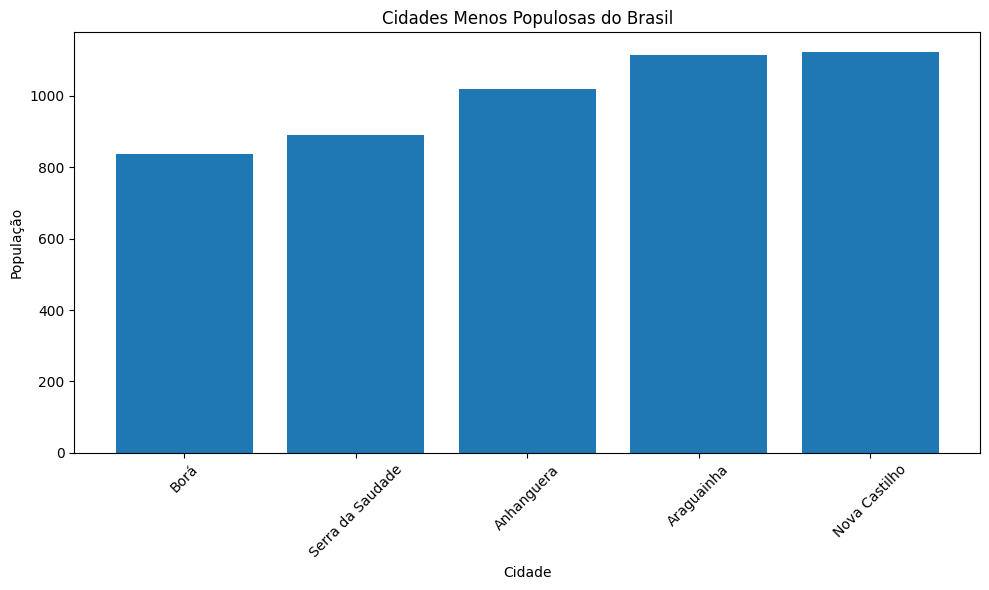

In [29]:
# código para gerar a visualização
plt.figure(figsize=(10, 6))
plt.bar(head_cidades['cidade'], head_cidades['populacao'])
plt.xlabel('Cidade')
plt.ylabel('População')
plt.title('Cidades Menos Populosas do Brasil')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Visualização

In [30]:
# código para gerar a visualização

soma_populacao_por_regiao = df_brasil.groupby('regiao')['populacao'].sum().reset_index()

# Renomear a coluna resultante
soma_populacao_por_regiao.rename(columns={'populacao': 'População Total'}, inplace=True)

# Exibir o DataFrame resultante
print(soma_populacao_por_regiao)

         regiao  População Total
0  CENTRO-OESTE         13773930
1      NORDESTE         53491940
2         NORTE         15359608
3       SUDESTE         80831550
4           SUL         27719118


In [31]:
###grafico de PIZZAS####
df = pd.DataFrame({'População Total': [13773930,53491940,15359608,80831550,27719118]},
                  index=[' CENTRO-OESTE','NORDESTE','NORTE','SUDESTE','SUL'])

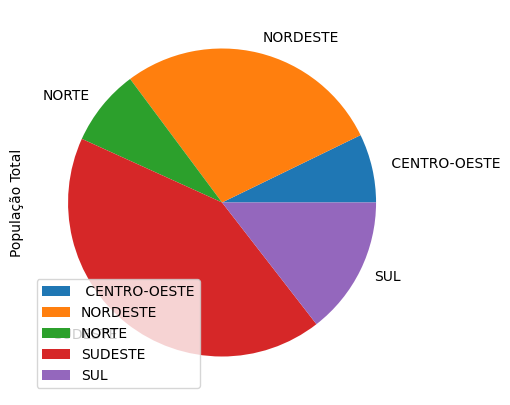

In [32]:
plot = df.plot.pie(y='População Total', figsize=(5, 5))

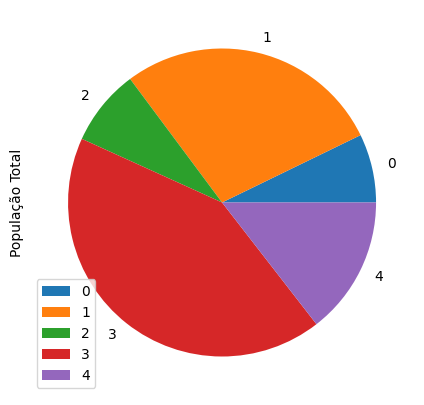

In [33]:
##POPULAÇÃO TOTAL###
plot = soma_populacao_por_regiao.plot.pie(y='População Total', figsize=(5, 5))